# Atividade 02

Por João Victor de Souza e Julio Carvalho

In [465]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

# Carregando Dataset

In [466]:
dataSet = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')
dataSet.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [467]:
dataSet.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [468]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


## Verificando valores faltantes

In [469]:
dataSet.isna().any()

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool

## Removendo duplicatas

In [470]:
data = dataSet.drop_duplicates()

## Verificando outliers

In [471]:
#Renomeando o rótulo da ultima coluna
data = data.rename(columns={'whether he/she donated blood in March 2007':'output'})

In [472]:
threshold = 3
z=np.abs(stats.zscore(data['Recency (months)']))
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 6 índices

Esses indices são:
 [366 367 368 369 531 532]


In [473]:
z=np.abs(stats.zscore(data['Frequency (times)']))
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 9 índices

Esses indices são:
 [  0   9 262 370 372 373 374 375 386]


In [474]:
z=np.abs(stats.zscore(data['Monetary (c.c. blood)']))
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 9 índices

Esses indices são:
 [  0   9 262 370 372 373 374 375 386]


In [475]:
z=np.abs(stats.zscore(data['Time (months)']))
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 0 índices

Esses indices são:
 []


Removendo outliers

In [476]:
data = data.drop(data.index[[0,9,262,370,372,373,374,375,386,366,367, 368, 369, 531, 532]])

# Tarefa 1

Abaixo podemos notar que este dataset é um pouco desbalanceado.

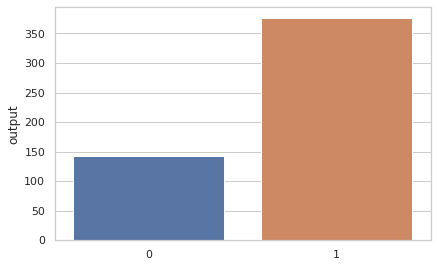

In [477]:
sns.set(style='whitegrid')
sns.barplot(x=data['output'].unique(),y=data['output'].value_counts())

## Dividindo cojunto de dados.

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

In [479]:
X = data.drop('output', axis = 1)
y = data.iloc[: , -1:]

### Esquema de particionamento 1.

In [480]:
# Letra A) i)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((347, 4), (171, 4), (347, 1), (171, 1))



> Treinamento do modelo e previsão



In [481]:
gnb = GaussianNB()

gnb.fit(X_train, y_train) #trainamento

y_pred = gnb.predict(X_test) #previsão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




> Abaixo vemos a Acurácia do particionamento 1



In [482]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       120
           1       0.64      0.27      0.38        51

    accuracy                           0.74       171
   macro avg       0.69      0.60      0.61       171
weighted avg       0.72      0.74      0.70       171





> Matriz de confusão



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


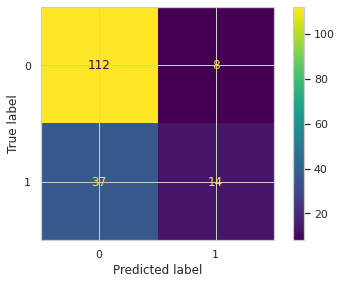

In [483]:
plot_confusion_matrix(gnb, X_test, y_test)



> Curva ROC



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


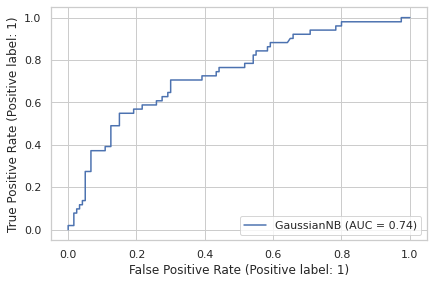

In [484]:
metrics.plot_roc_curve(gnb, X_test, y_test) 



> Agora com a técnica de validação cruzada, temos:



In [485]:
scores = cross_val_score(gnb, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [486]:
print(scores)
print('\nAcurácia: %0.2f' % (scores.mean()))

[0.59615385 0.86538462 0.73076923 0.73076923 0.73076923 0.73076923
 0.65384615 0.73076923 0.74509804 0.7254902 ]

Acurácia: 0.72


### Esquema de particionamento 2.

In [487]:
# Letra A) ii)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=0)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((388, 4), (130, 4), (388, 1), (130, 1))



> Treinamento do modelo e previsão



In [488]:
gnb2 = GaussianNB()

gnb2.fit(X_train2, y_train2) #treinamento

y_pred2 = gnb2.predict(X_test2) #previsão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Abaixo vemos a acurácia do particionamento 2

In [489]:
print(metrics.classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        92
           1       0.60      0.24      0.34        38

    accuracy                           0.73       130
   macro avg       0.67      0.59      0.59       130
weighted avg       0.70      0.73      0.69       130





> Matriz de confusão



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


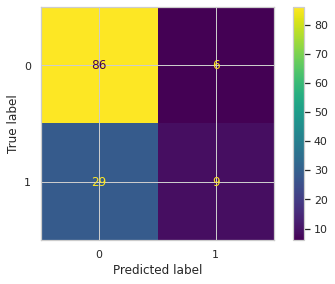

In [490]:
plot_confusion_matrix(gnb, X_test2, y_test2)



> Curva ROC



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


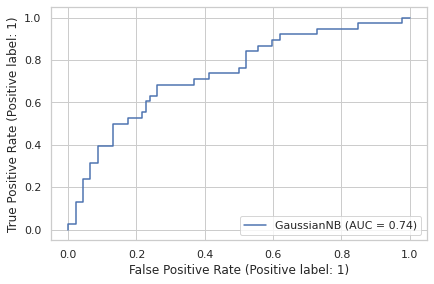

In [491]:
metrics.plot_roc_curve(gnb2, X_test2, y_test2) 



> Utilizando a técnica de validação cruzada, temos:



In [492]:
scores2 = cross_val_score(gnb2, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [493]:
print(scores2)
print('\nAcurácia: %0.2f' % (scores2.mean()))

[0.59615385 0.86538462 0.73076923 0.73076923 0.73076923 0.73076923
 0.65384615 0.73076923 0.74509804 0.7254902 ]

Acurácia: 0.72


### Agora utilizando uma divisão estratificada





### Esquema de particionamento estratificado 1


In [494]:
X_train_strf1, X_test_strf1, y_train_strf1, y_test_strf1 = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)
X_train_strf1.shape, X_test_strf1.shape, y_train_strf1.shape, y_test_strf1.shape

((347, 4), (171, 4), (347, 1), (171, 1))

In [495]:
gnb_strf1 = GaussianNB()

gnb_strf1.fit(X_train_strf1, y_train_strf1) #trainamento

y_pred_strf1 = gnb_strf1.predict(X_test_strf1) #previsão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Abaixo vemos a acurácia do particionamento estratificado 1:

In [496]:
print(metrics.classification_report(y_test_strf1,y_pred_strf1))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       124
           1       0.33      0.15      0.21        47

    accuracy                           0.68       171
   macro avg       0.53      0.52      0.50       171
weighted avg       0.62      0.68      0.64       171



> Utilizando validação cruzada

In [497]:
scores_strf1 = cross_val_score(gnb_strf1, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [498]:
print(scores_strf1)
print('\nAcurácia: %0.2f' % (scores_strf1.mean()))

[0.59615385 0.86538462 0.73076923 0.73076923 0.73076923 0.73076923
 0.65384615 0.73076923 0.74509804 0.7254902 ]

Acurácia: 0.72


### Esquema de particionamento estratificado 2

In [499]:
X_train_strf2, X_test_strf2, y_train_strf2, y_test_strf2 = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
X_train_strf2.shape, X_test_strf2.shape, y_train_strf2.shape, y_test_strf2.shape

((388, 4), (130, 4), (388, 1), (130, 1))

In [500]:
gnb_strf2 = GaussianNB()

gnb_strf2.fit(X_train_strf2, y_train_strf2) #trainamento

y_pred_strf2 = gnb_strf2.predict(X_test_strf2) #previsão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Abaixo vemos a acurácia do particionamento estratificado 2:

In [501]:
print(metrics.classification_report(y_test_strf2,y_pred_strf2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        94
           1       0.64      0.19      0.30        36

    accuracy                           0.75       130
   macro avg       0.70      0.58      0.57       130
weighted avg       0.72      0.75      0.69       130



> Utilizando validação cruzada

In [502]:
scores_strf2 = cross_val_score(gnb_strf2, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [503]:
print(scores_strf2)
print('\nAcurácia: %0.2f' % (scores_strf2.mean()))

[0.59615385 0.86538462 0.73076923 0.73076923 0.73076923 0.73076923
 0.65384615 0.73076923 0.74509804 0.7254902 ]

Acurácia: 0.72


## Conclusão

Temos que para este dataset a acurácia de aproximadamente (73%) utilizando a técnica de validação cruzada. podendo variar dependendo da interação. Utilizar random_state para fixar.

# Tarefa 2

Como todos os casos desse modelo tiveram uma acurácia parecida, utilizarei pra essa tarefa o modelo estratificado com 25% pra teste.

In [504]:
#!pip install graphviz 
#!pip install pydotplus
from sklearn import tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

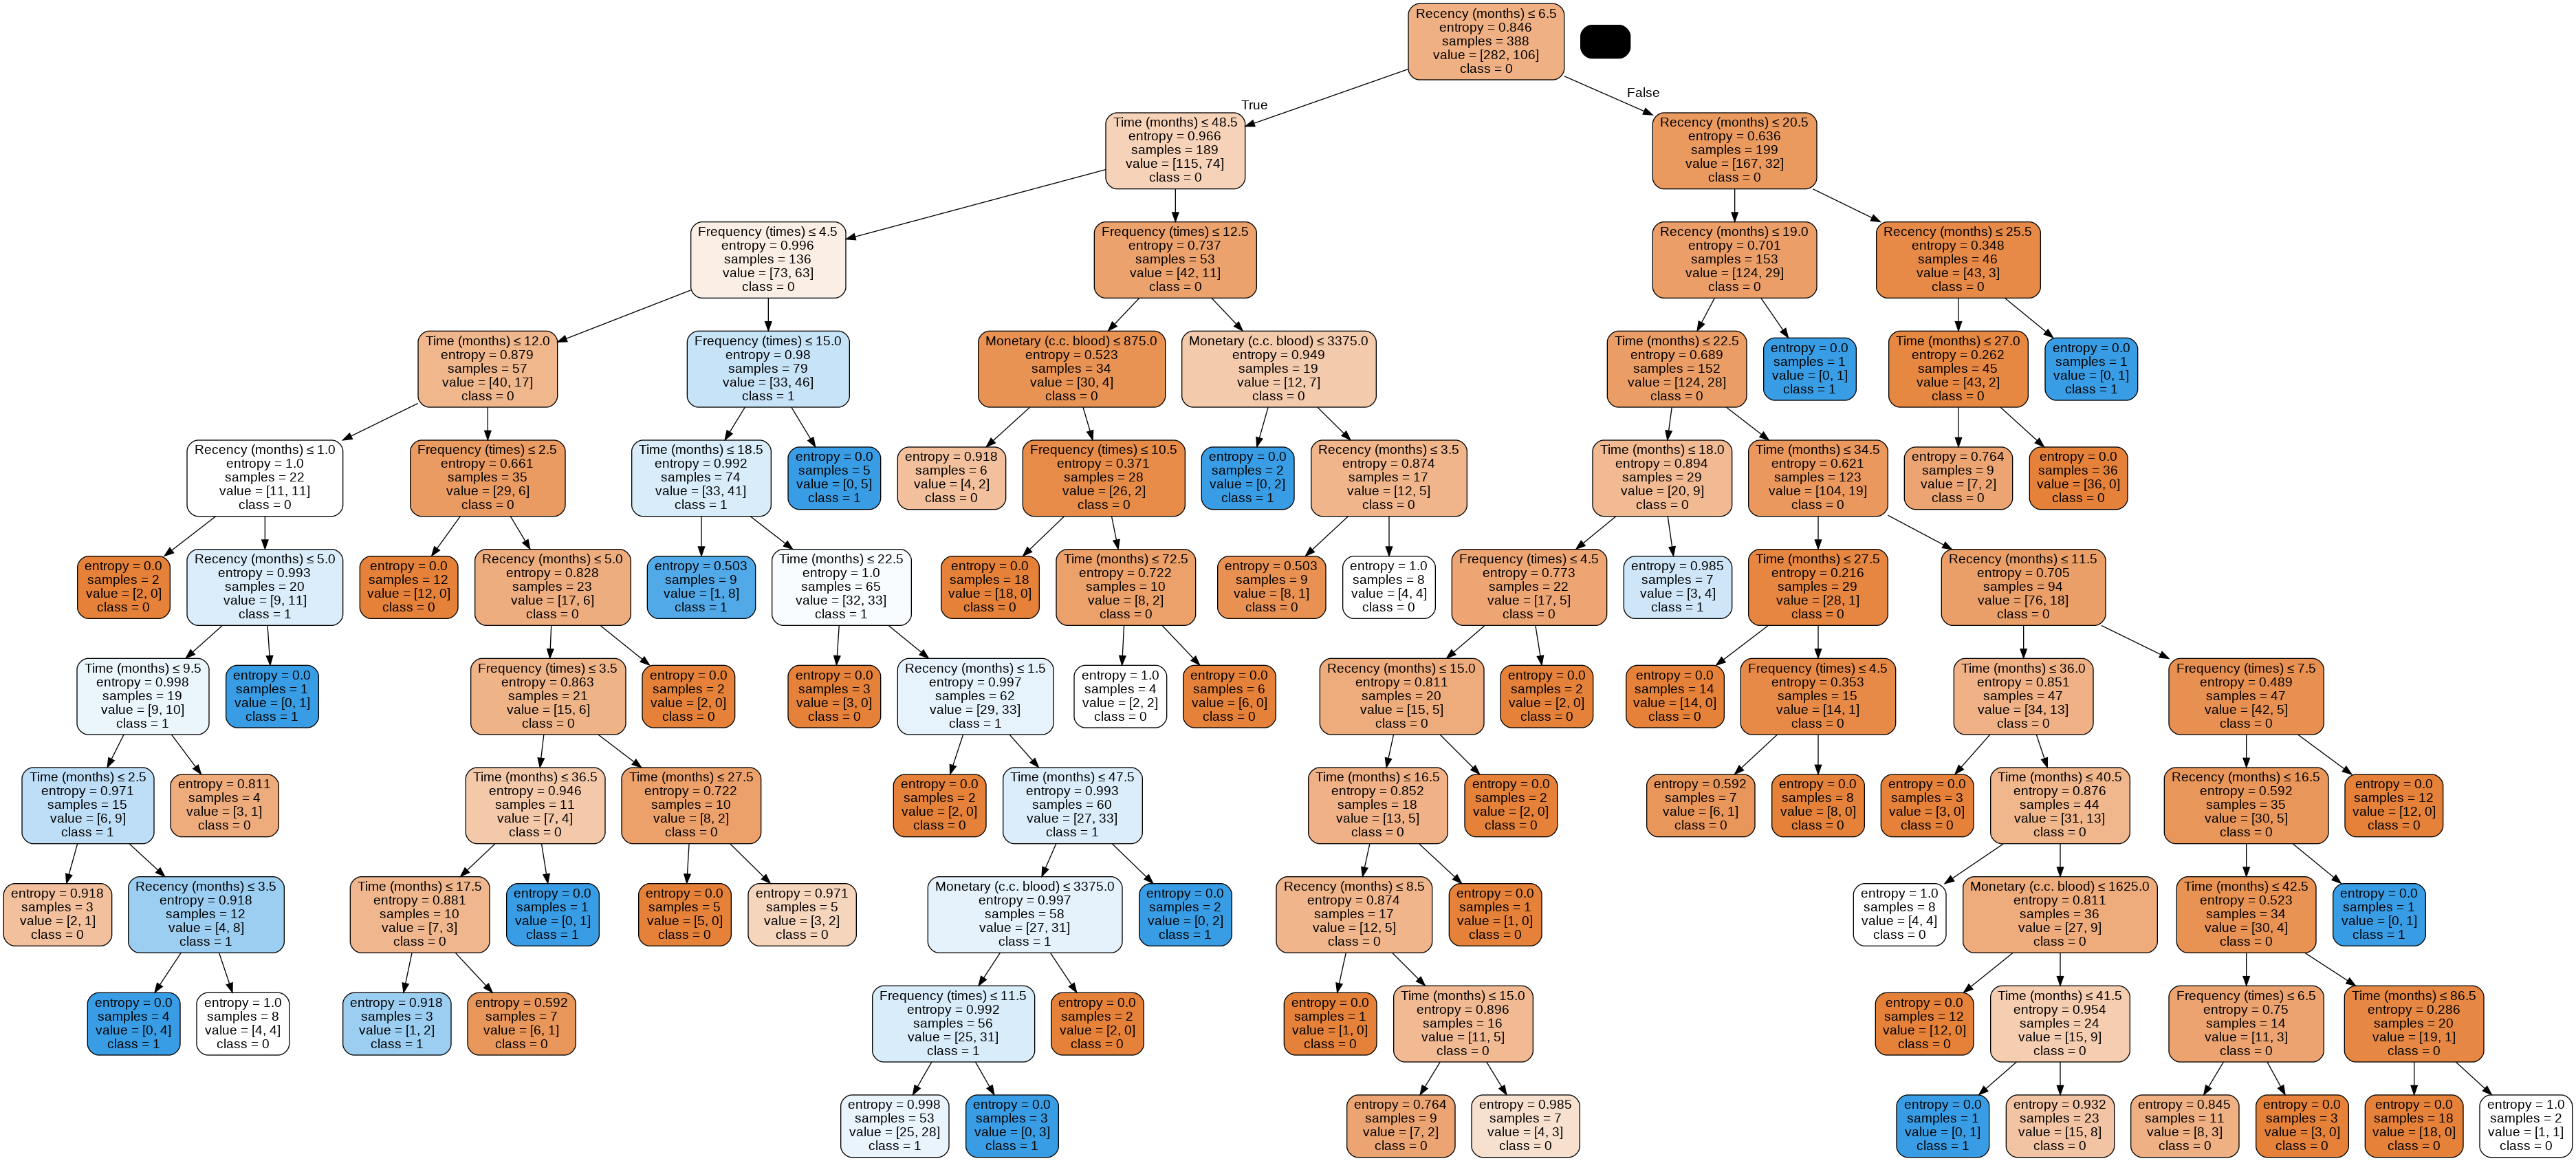

In [505]:
strf2_tree = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=10,max_depth=10)
strf2_tree = strf2_tree.fit(X_train_strf2, y_train_strf2)

dot_data = StringIO()
export_graphviz(strf2_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Acurácia da árvore de decisão

In [506]:
#Predict the response for test dataset
y_pred_tree = strf2_tree.predict(X_test_strf2)

# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test_strf2,y_pred_tree))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        94
           1       0.46      0.33      0.39        36

    accuracy                           0.71       130
   macro avg       0.62      0.59      0.60       130
weighted avg       0.68      0.71      0.69       130



> Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


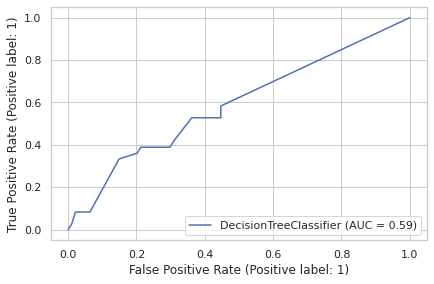

In [507]:
metrics.plot_roc_curve(strf2_tree, X_test_strf2, y_test_strf2) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


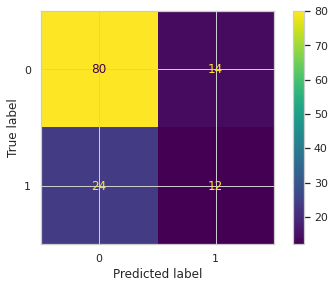

In [508]:
plot_confusion_matrix(strf2_tree, X_test_strf2, y_test_strf2)  

# tarefa 3

In [509]:
from matplotlib import pyplot as plt2
from sklearn.cluster import KMeans

In [510]:
data2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data2

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [511]:
data2

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4




> Checar se tem valores faltantes



In [512]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Vemos que nao temos valores nulos ou na. Porém, temos uma coluna do tipo object, utilizando astype(), nos retorna um erro dizendo que possui valores com '?'. Então vamos remover as linhas com esses valores.

In [513]:
remove = data2[(data2[6].str.find('?') != -1)].index
print(remove)
data2.drop(remove, inplace=True)

Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')


In [514]:
data2 = data2.astype(int)

Agora sim, nenhum valor faltante

In [515]:
data2.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

## definir melhor quantidade de clusters

Aqui são removidas a primeira e a ultima colunas, uma relacionada a 'Sample code number' (não necessária) e a outra ao output.

In [516]:
X = np.array(data2.drop([0,10], axis=1))
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

> Método elbow

In [517]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

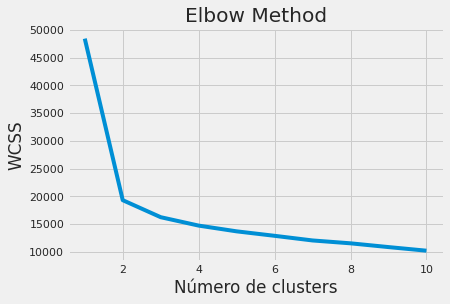

In [518]:
plt2.style.use("fivethirtyeight")
plt2.plot(range(1, 11), elbow)
plt2.title('Elbow Method')
plt2.xlabel('Número de clusters')
plt2.ylabel('WCSS')
plt2.show()

Vemos que o elbow nos dá o numero de clusters **k=2**.

> Coeficiente silhueta

In [519]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

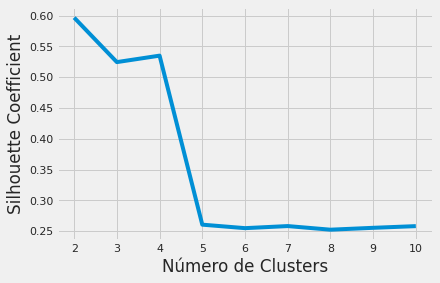

In [520]:
plt2.style.use("fivethirtyeight")
plt2.plot(range(2, 11), silhouette_coefficients)
plt2.xticks(range(2, 11))
plt2.xlabel("Número de Clusters")
plt2.ylabel("Silhouette Coefficient")
plt2.show()

Vemos também que o coeficiente silhueta nos dá o número de clusters **k=2**.

## Criar modelo com 2 clusters.

In [521]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [522]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

Resultados do K-means

In [523]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

Algumas mudanças

In [524]:
data2['K-means'] = kmeans.labels_
data2 = data2.rename(columns={10: 'output'})

In [525]:
data2

,0,1,2,3,4,5,6,7,8,9,output,K-means
0,1000025,5,1,1,1,2,1,3,1,1,2,1
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,1
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,1
695,841769,2,1,1,1,2,1,1,1,1,2,1
696,888820,5,10,10,3,7,3,8,10,2,4,0
697,897471,4,8,6,4,3,4,10,6,1,4,0


In [526]:
# Class: (2 for benign, 4 for malignant)

data2['K-means'] = data2['K-means'].map({1:2, 0:4})
data2

,0,1,2,3,4,5,6,7,8,9,output,K-means
0,1000025,5,1,1,1,2,1,3,1,1,2,2
1,1002945,5,4,4,5,7,10,3,2,1,2,4
2,1015425,3,1,1,1,2,2,3,1,1,2,2
3,1016277,6,8,8,1,3,4,3,7,1,2,4
4,1017023,4,1,1,3,2,1,3,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,2
695,841769,2,1,1,1,2,1,1,1,1,2,2
696,888820,5,10,10,3,7,3,8,10,2,4,4
697,897471,4,8,6,4,3,4,10,6,1,4,4


## Acurácia:

In [527]:
(data2['K-means'] == data2['output'])

0       True
1      False
2       True
3      False
4       True
       ...  
694     True
695     True
696     True
697     True
698     True
Length: 683, dtype: bool

In [528]:
(data2['K-means'] == data2['output']).sum()

656

Aqui podemos ver que o K-means classificou corretamente 656 valores, de 683.
Com isso tem uma acurácia de **96.05%**

In [529]:
print('Acurácia de %0.2f' % ((656/683)*100),'%')

Acurácia de 96.05 %
